In [2]:
import os
import shutil
import pathlib
import random

original_dir = pathlib.Path("/kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset")
new_base_dir = pathlib.Path("rice_image_spilt")

def make_subset(subset_name, start_index, end_index):
    for variety in os.listdir(original_dir):
        variety_dir = original_dir / variety
        if not os.path.isdir(variety_dir):
            continue
        image_files = os.listdir(variety_dir)
        image_files = sorted(image_files)
        subset_dir = new_base_dir / subset_name / variety
        os.makedirs(subset_dir, exist_ok=True)
        print(f"Copying files for variety {variety}...")
        for i in range(start_index, min(end_index, len(image_files))):
            try:
                image_file = image_files[i]
                src = variety_dir / image_file
                dst = subset_dir / image_file
                print(f"Copying {src} to {dst}")
                shutil.copyfile(src, dst)
            except Exception as e:
                print(f"Error copying file {src}: {e}")

# Make train, validation, and test subsets
make_subset("train", start_index=0, end_index=4000)  # 70% of 10,000
make_subset("validation", start_index=7000, end_index=8000)  # 20% of 10,000
make_subset("test", start_index=9000, end_index=9500)  # 10% of 10,000

Copying files for variety Karacadag...
Copying /kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset/Karacadag/Karacadag (1).jpg to rice_image_spilt/train/Karacadag/Karacadag (1).jpg
Copying /kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10).jpg to rice_image_spilt/train/Karacadag/Karacadag (10).jpg
Copying /kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset/Karacadag/Karacadag (100).jpg to rice_image_spilt/train/Karacadag/Karacadag (100).jpg
Copying /kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset/Karacadag/Karacadag (1000).jpg to rice_image_spilt/train/Karacadag/Karacadag (1000).jpg
Copying /kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10000).jpg to rice_image_spilt/train/Karacadag/Karacadag (10000).jpg
Copying /kaggle/input/variety-of-rice-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10001).jpg to rice_image_spilt/train/Karacadag/Karacadag (10001).jpg
Copying /kaggle/input/variety-of-rice-dataset/Rice_

**Building the model**

# Instantiating a small convnet 


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2024-04-29 10:01:06.539117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 10:01:06.539211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 10:01:06.669400: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,758,917 (63.93 MB)

 Trainable params: 16,758,917 (63.93 MB)

 Non-trainable params: 0 (0.00 B)

Configuring the model for training


In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

Using image_dataset_from_directory to read images

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 23000 files belonging to 5 classes.
Found 5000 files belonging to 5 classes.
Found 2500 files belonging to 5 classes.


In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset

In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
  3/719 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.2326 - loss: 4.8413   

I0000 00:00:1714384974.031695     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


719/719 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 0.7763 - loss: 0.6528 - val_accuracy: 0.9570 - val_loss: 0.1478
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.9624 - loss: 0.1122 - val_accuracy: 0.9622 - val_loss: 0.1476
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.9681 - loss: 0.0951 - val_accuracy: 0.9682 - val_loss: 0.4616
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.9740 - loss: 0.0819 - val_accuracy: 0.9580 - val_loss: 0.2475
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.9818 - loss: 0.0583 - val_accuracy: 0.9528 - val_loss: 0.1651
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.9827 - loss: 0.0536 - val_accuracy: 0.9862 - val_loss: 0.0798
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.9820 - loss: 0.0619 - val_accuracy: 0.9378 - val_loss: 0.2765
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accurac

Displaying curves of loss and accuracy during training

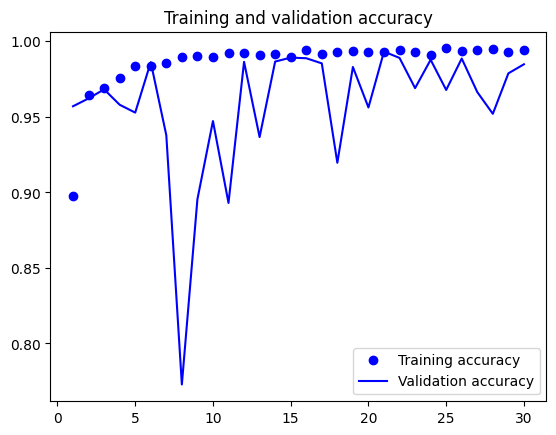

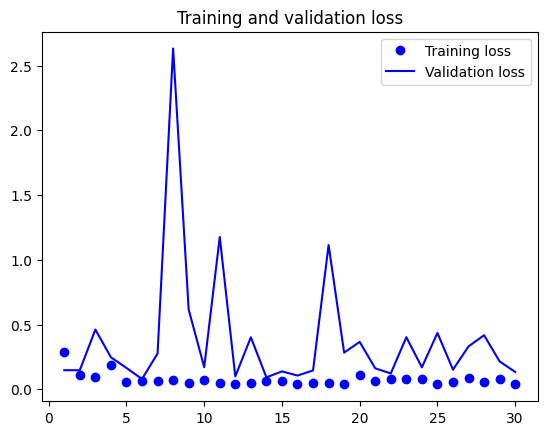

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [14]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9916 - loss: 0.0311
Test accuracy: 0.989


# Using data augmentation
**Define a data augmentation stage to add to an image model**

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Displaying some randomly augmented training images

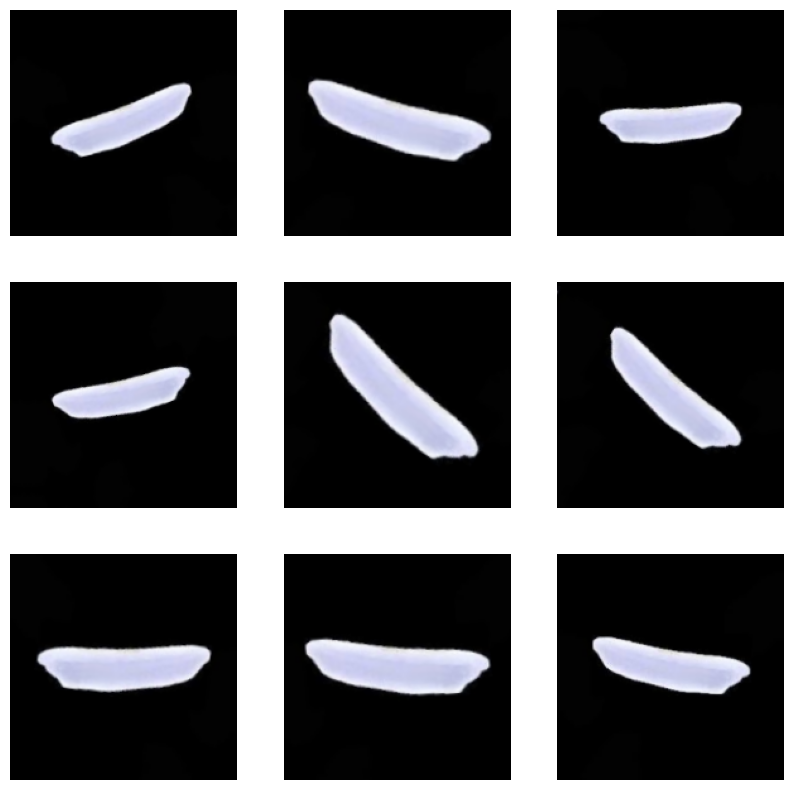

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the regularized convnet

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.7358 - loss: 0.6373 - val_accuracy: 0.8912 - val_loss: 0.2814
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9420 - loss: 0.1638 - val_accuracy: 0.9022 - val_loss: 0.2910
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9749 - loss: 0.0775 - val_accuracy: 0.9462 - val_loss: 0.1849
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9816 - loss: 0.0649 - val_accuracy: 0.9598 - val_loss: 0.1255
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9528 - val_loss: 0.1759
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9883 - loss: 0.0442 - val_accuracy: 0.9578 - val_loss: 0.1507
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9901 - loss: 0.0410 - val_accuracy: 0.8986 - val_loss: 0.4675
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9901 - loss: 0.0382 - 

Evaluating the model on the test set

In [20]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9809 - loss: 0.1638
Test accuracy: 0.981


# Leveraging a pretrained model
# Feature extraction with a pretrained model
**Instantiating the VGG16 convolutional base**

In [21]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Fast feature extraction without data augmentation**

**Extracting the VGG16 features and corresponding labels**

In [26]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [27]:
train_features.shape

(23000, 5, 5, 512)

Defining and training the densely connected classifier

In [28]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8871 - loss: 76.9463 - val_accuracy: 0.9700 - val_loss: 18.4002
Epoch 2/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9650 - loss: 22.4940 - val_accuracy: 0.9600 - val_loss: 30.4006
Epoch 3/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 15.9510 - val_accuracy: 0.9700 - val_loss: 18.0483
Epoch 4/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9704 - loss: 17.5396 - val_accuracy: 0.9844 - val_loss: 9.9315
Epoch 5/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9755 - loss: 11.9594 - val_accuracy: 0.9772 - val_loss: 12.6773
Epoch 6/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9779 - loss: 10.2157 - val_accuracy: 0.9708 - val_loss: 14.6435
Epoch 7/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9790 - loss: 10.2429 - val_accuracy: 0.9836 - val_loss: 10.9986
Epoch 8/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9787 - loss: 9.5708 - val

Plotting the results

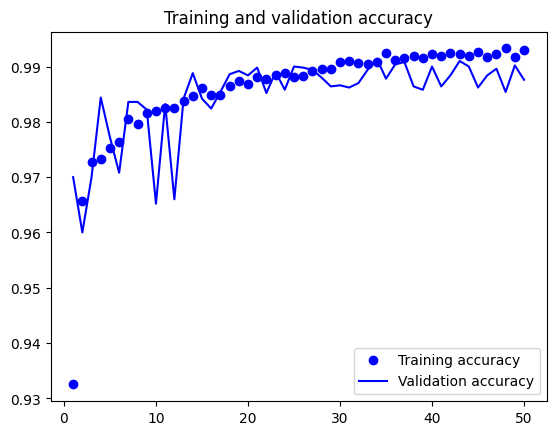

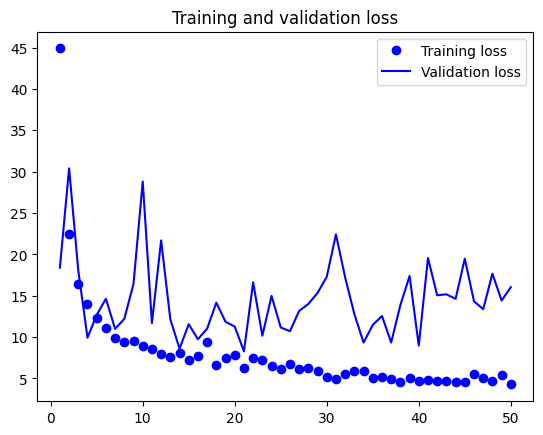

In [29]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Feature extraction together with data augmentation
**Instantiating and freezing the VGG16 convolutional base**

In [30]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

Printing the list of trainable weights before and after freezing

In [31]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [32]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base

In [33]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="feature_extraction_with_data_augmentation.keras",
#         save_best_only=True,
#         monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Evaluating the model on the test set

In [ ]:
# test_model = keras.models.load_model(
#     "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# **Fine-tuning a pretrained model**

In [ ]:
conv_base.summary()

Freezing all layers until the fourth from the last

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Fine-tuning the model

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
# model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")